In [2]:
#@title Importing libraries
import pandas as pd                      # reading and working with data
import numpy as np                       # for calculations
import matplotlib.pyplot as plt          # for simple plots
import seaborn as sns                    # for more complicated plots

# Sckit Learn ML Library
from sklearn.model_selection import train_test_split     # to split the data into training and testing
from sklearn.preprocessing import StandardScaler         # to normalize the values of the features

from sklearn.linear_model import LogisticRegression                              # Model 1: Logistic Regression
from sklearn.ensemble import RandomForestClassifier                             # Model 2: RandomForestClassifier

from sklearn.metrics import mean_squared_error, r2_score # to measure performance of the models

In [ ]:
#@title Loading the data

# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Initializing The Data Set For An Informative Start**

In [5]:
#@title Looking at the data from Matan's Drive

loan = pd.read_csv("loan approval classification external dataset.csv",header=0, index_col=0)
loan.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP002244,Male,Yes,0,Graduate,No,2333,2417.0,136.0,360.0,1.0,Urban
LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban
LP002226,Male,Yes,0,Graduate,NaN,3333,2500.0,128.0,360.0,1.0,Semiurban
LP001514,Female,Yes,0,Graduate,No,2330,4486.0,100.0,360.0,1.0,Semiurban
LP001259,Male,Yes,1,Graduate,Yes,1000,3022.0,110.0,360.0,1.0,Urban
LP002379,Male,No,0,Graduate,No,6500,0.0,105.0,360.0,0.0,Rural
LP002894,Female,Yes,0,Graduate,No,3166,0.0,36.0,360.0,1.0,Semiurban
LP001194,Male,Yes,2,Graduate,No,2708,1167.0,97.0,360.0,1.0,Semiurban
LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban


In [ ]:
# A section that will provide us with 3 metrics to understand our target distribution tendancy:
# Total count of loans given or not
# Total count of unique values in the Loan_Status
# The distribution of variables in the Loan_Status column

print(f"Total count of values in the 'Loan_Status' column is {loan['Loan_Status'].count()} values \n")

print(f"Total count of unique values in the 'Loan_Status' column is {loan['Loan_Status'].nunique()} values \n")

print('The distributuin if loan was given is: \n')
loan['Loan_Status'].value_counts()

Total count of values in the 'Loan_Status' column is 304 values 

Total count of unique values in the 'Loan_Status' column is 2 values 

The distributuin if loan was given is: 



,count
Loan_Status,
Y,216
N,88


In [ ]:
# Important info
print("Data shape:", loan.shape)             # print number of rows and columns
print('\n')

# Print DataFrame information (gives info such as if there are null-values and the data types in the columns)
loan_info = loan.info()
print(loan_info)

Data shape: (304, 12)


<class 'pandas.core.frame.DataFrame'>
Index: 304 entries, LP001938 to LP002296
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             299 non-null    object 
 1   Married            304 non-null    object 
 2   Dependents         296 non-null    object 
 3   Education          304 non-null    object 
 4   Self_Employed      287 non-null    object 
 5   ApplicantIncome    304 non-null    int64  
 6   CoapplicantIncome  304 non-null    float64
 7   LoanAmount         304 non-null    float64
 8   Loan_Amount_Term   295 non-null    float64
 9   Credit_History     277 non-null    float64
 10  Property_Area      304 non-null    object 
 11  Loan_Status        304 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 30.9+ KB
None


In [ ]:
# The following section is meant to describe why the 'Dependants' column is of type object and not int

print("The following section is meant to describe why is the 'Dependants' column is of type 'object' and not 'int' \n")
print(f"Total count of unique values in the 'Dependents' column is {loan['Dependents'].nunique()} values \n")

print('The distributuin od dependants was given is: \n')
loan['Dependents'].value_counts()

The following section is meant to describe why is the 'Dependants' column is of type 'object' and not 'int' 

Total count of unique values in the 'Dependents' column is 4 values 

The distributuin od dependants was given is: 



,count
Dependents,
0,185
2,48
1,43
3+,20



**Dataset issues:**
---

### 1.   The dataset contains both numeric and non-numeric data (types: object, int64 and float64).
 Specifically, features 5, 6, 7, 8, 9 contain numeric values (int65, float64, float64, float64, float64 respectively). While the others 0-4 and 10, 11 contain type object, while our target feature is 11 ('Loan_Status')

---

### 2.   The dataset contains values from different ranges.

---

### 3.   Counted 304 rows, noticing that columns Gender, Dependents, Self_Employed, Loan_Amount_Term, Credit_History. All contain Null values which need to be treated

---


# **Approach to Attend to Issues and Preprocess:**

### 1. Convert NaN values in numerical columns with mean imputation
### 2. Convert NaN values in categorical columns with mode imputation
### 3. Categorical Values will be transformed to numerical values by creating dummies
### 4. Split the data into train and test sets
### 5. Scale the feature values to a uniform range

**Handeling Missibng Values**



1.   Before imputing numerical columns, we must check the tendency of each column, whether it is normally distributed or skewed
2.   List item



In [ ]:
print('The distributuin of Loan_Amount_Term was given is: \n')
loan['Loan_Amount_Term'].value_counts()

The distributuin of Loan_Amount_Term was given is: 



,count
Loan_Amount_Term,
360.0,248
180.0,25
480.0,7
300.0,7
120.0,2
84.0,2
240.0,2
60.0,1
36.0,1


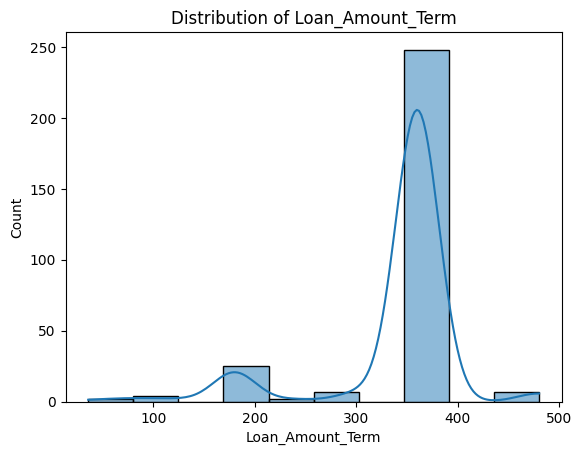

In [ ]:
sns.histplot(loan['Loan_Amount_Term'], kde=True)
plt.title("Distribution of Loan_Amount_Term")
plt.show()

# **What Does This Mean?**

The Loan_Amount_Term column (which is a numerical value column) is right-skewed (positively skewed), which drives us to consider to **impute this column with the median rather than the mean**, as it will better represent the tendancy of the array.

In [ ]:
print('The distributuin of Credit_History was given is: \n')
loan['Credit_History'].value_counts()

The distributuin of Credit_History was given is: 



,count
Credit_History,
1.0,231
0.0,46


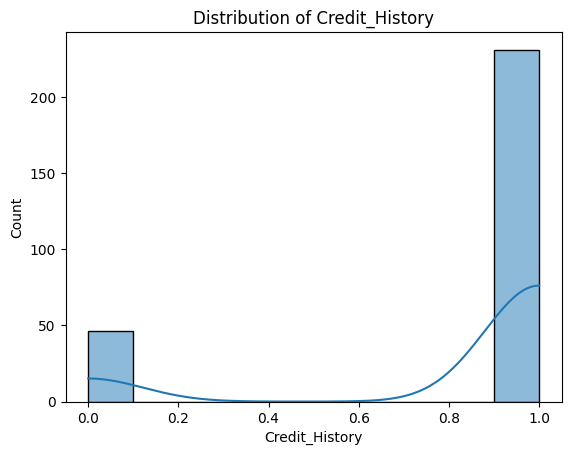

In [ ]:
sns.histplot(loan['Credit_History'], kde=True)
plt.title("Distribution of Credit_History")
plt.show()

# **What Does This Mean?**

The Credit_History can be confusing because the type of the vlaues inside the column is of type int, which can confuse us to choose imputing it with a mean or a median. In this case it's a 'Yes' / 'No' type of data, "Is there credit history or not 1-0. It's a categorical column. Therefore the imputation would be with the **Mode**

In [ ]:
# Count the number of NaNs in the dataset and print the counts for verification
loan.isnull().sum()

,0
Gender,5
Married,0
Dependents,8
Education,0
Self_Employed,17
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,9
Credit_History,27


In [ ]:
# Numerical Columns

# Missing values with median imputation for the numerical columns

loan['Loan_Amount_Term'] = loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].median())

In [ ]:
# The special numerical column imputed with the mode:

loan['Credit_History'] = loan['Credit_History'].fillna(loan['Credit_History'].mode()[0])

# Categorical Columns

# Missing values with mode imputation for the categorical columns
for col in loan:
    if loan[col].dtypes == 'object':
        loan[col] = loan[col].fillna(loan[col].mode()[0])

In [ ]:
# Print DataFrame information and making sure compatability with data types
loan_info = loan.info()
print(loan_info)


<class 'pandas.core.frame.DataFrame'>
Index: 304 entries, LP001938 to LP002296
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             304 non-null    object 
 1   Married            304 non-null    object 
 2   Dependents         304 non-null    object 
 3   Education          304 non-null    object 
 4   Self_Employed      304 non-null    object 
 5   ApplicantIncome    304 non-null    int64  
 6   CoapplicantIncome  304 non-null    float64
 7   LoanAmount         304 non-null    float64
 8   Loan_Amount_Term   304 non-null    float64
 9   Credit_History     304 non-null    float64
 10  Property_Area      304 non-null    object 
 11  Loan_Status        304 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 39.0+ KB
None


In [ ]:
# Count the number of NaNs in the dataset and print the counts for verification
loan.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


**Creating Dummies to treat categorical values with data type 'object'**

In [ ]:
#@title Convert categorical features into numeric using get_dummies

# One-hot encoding creates new columns (0 and 1) for each category, dropping first To avoid multicollinearity
# But why?
# logistic regression assume no perfect multicollinearity. If all dummy variables are included, the model might crash or give unstable coefficients.
# Multicollinearity happens when two or more features (columns) in a dataset are strongly correlated — meaning they contain similar or redundant information


loan_transformed = pd.get_dummies(loan, dtype=int, drop_first=True)

In [ ]:
for col in loan_transformed.columns:
  print(col)

ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term
Credit_History
Gender_Male
Married_Yes
Dependents_1
Dependents_2
Dependents_3+
Education_Not Graduate
Self_Employed_Yes
Property_Area_Semiurban
Property_Area_Urban
Loan_Status_Y


**Visualizing the new dataset with dummies**

In [ ]:
loan_transformed.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
Loan_ID,,,,,,,,,,,,,,,
LP001938,4400,0.0,127.0,360.0,0.0,1,1,0,1,0,0,0,1,0,0
LP002537,2083,3150.0,128.0,360.0,1.0,1,1,0,0,0,0,0,1,0,1
LP001027,2500,1840.0,109.0,360.0,1.0,1,1,0,1,0,0,0,0,1,1
LP002366,2666,4300.0,121.0,360.0,1.0,1,1,0,0,0,0,0,0,0,1
LP002916,2297,1522.0,104.0,360.0,1.0,1,1,0,0,0,0,0,0,1,1


In [ ]:
# Count the number of NaNs in the dataset and print the counts to verify
loan_transformed.isnull().sum()

,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0
Gender_Male,0
Married_Yes,0
Dependents_1,0
Dependents_2,0
Dependents_3+,0


In [ ]:
loan_transformed.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status_Y'],
      dtype='object')

**Splitting the data into train and test sets**

In [ ]:
#@title Input features (X) and target variable (y)

X = loan_transformed[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban']]
y = loan_transformed["Loan_Status_Y"]

In [ ]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                    y,
                                    test_size=0.2,
                                    random_state=42) # test_size 20% for testing, so 80% for training

#**Scaling Features**

# **After treating missing values, creating dummies, and splitting the data set we can move on to the last step of data preprocessing - scaling the features since they in different rnages**

In [ ]:
# Instantiate StandardScaler and use it to rescale X_train and X_test
scaler = StandardScaler()
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)


# **Fitting Models to the train set**

Before fitting the model, we must notice the fact that our data set contains more instances that correspond to "Loan_Y". More specifically: 216 clients were given a loan while 88 were denied a loan. (71% Yes, 29% No).

What does this mean?

We have an imbalanced model, which can mislead prediciton models. So, we are expecting that models that handle imbalance better would perform better.

The hypothesis:

1) Random Forest, XGBoost will handle imbalance better.

2) Logistic Regressio won't handle imblance pretty well.

**A Correlation Matrix and it's meaning:**

Feature Selection

If some features have very high correlation with the target, they are likely strong predictors.
That’s useful for simpler models like logistic regression, which benefit from clear signal.
If features are not correlated at all, they might be noise and can hurt model performance.
→ dropiing irrelevant features or create better ones usually help.

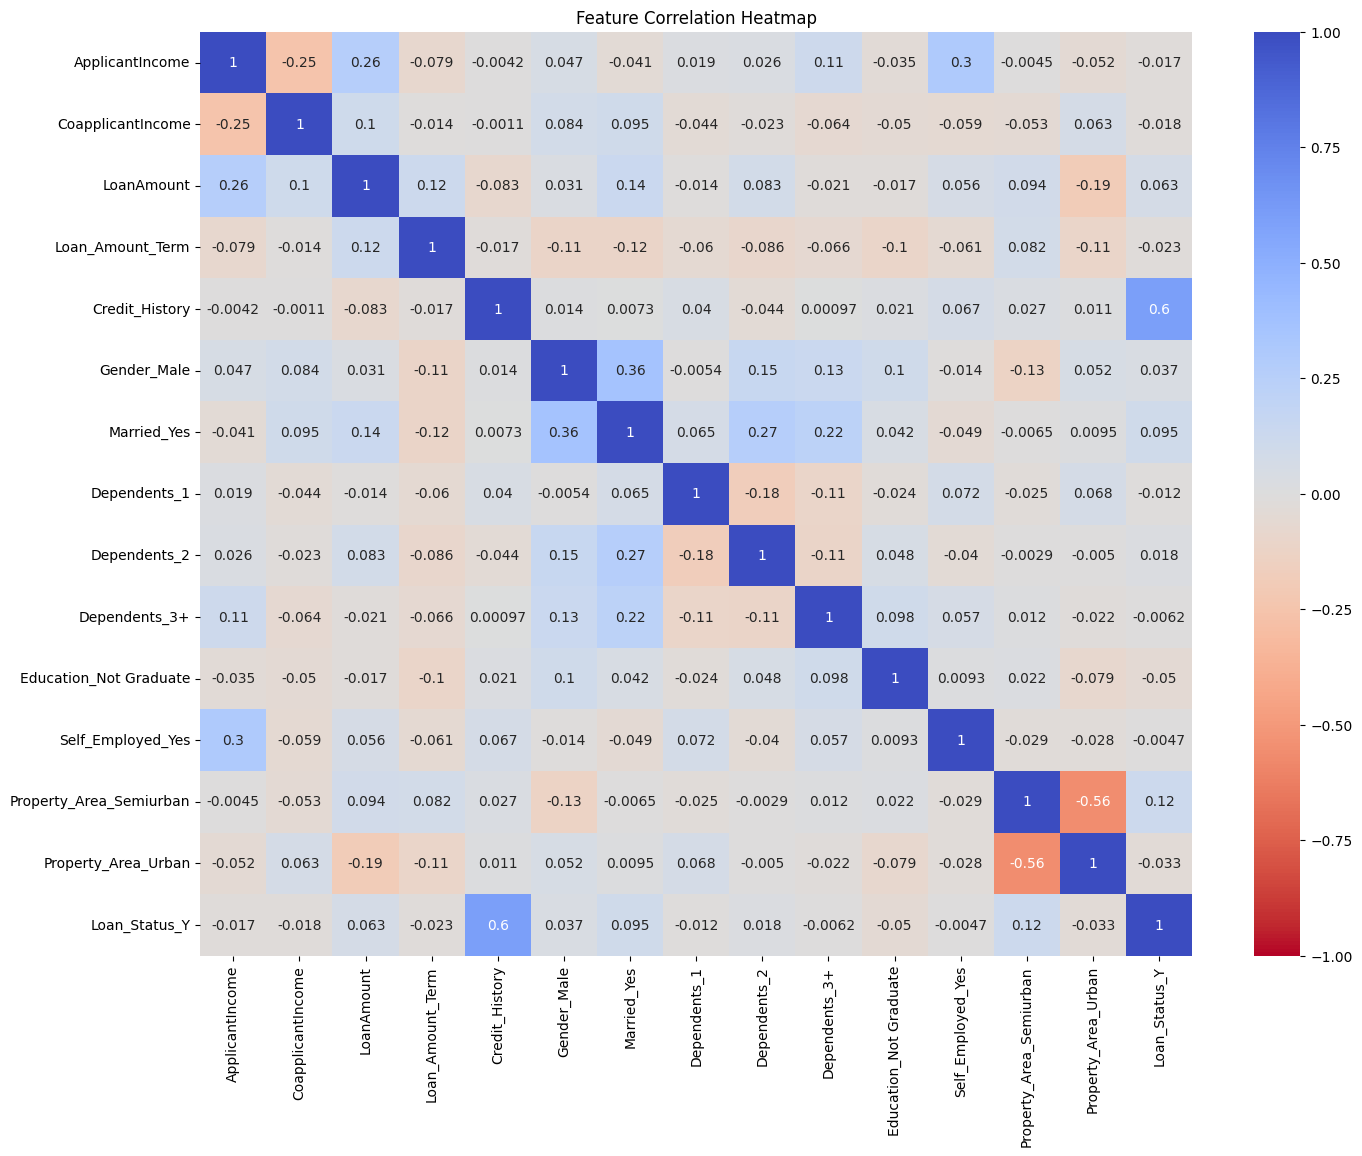

In [ ]:
# Checking Correlations should have to be AFTER converting categorical features to numerical, AND BEFORE scaling features becasue:
# 1) Correlation (Pearson’s by default) is a scale-invariant measure.
# 2) It looks at the linear relationship between variables — not their magnitude.
#@title Visualizing Data with Correlation Heatmap

plt.figure(figsize=(16, 12))
correlation_matrix = loan_transformed.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm_r", vmin=-1, vmax=1)  # annot=True for showing corr values
plt.title("Feature Correlation Heatmap")
plt.show()

#The Only thing we can infer, while taking into consideration that we dropped first columns from dummies is that there is considerabily high correlation between credit history and recieveing a loan, also some effect of Semiurben Property Area, Some influence of being married and the loan amount.

#In this case:
#We will not drop features becasue non of them effect too harshely or negatively the correaltion with the traget, and also our instinct tells us that these features are good traditional indicators for providing a loan

# **Training Logisitc Regression**

In [ ]:
# @title Train regression models

# Model 1 LogisticRegression

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledX_train,y_train)



LogisticRegression()

**Above we have trained logistic model over our rescaled X training sample**
**So, we can store a comparative prediction with our model using the rescaled X test sample**

In [ ]:
# Using logreg to predict instances from the test set and store it
y_pred_logreg = logreg.predict(rescaledX_test)

**Checking accuracy metrics of the Logistic Regression Model**

In [ ]:
print("Logistic Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_logreg))
print("R2 Score:", r2_score(y_test, y_pred_logreg))

Logistic Regression:
MSE: 0.19672131147540983
R2 Score: 0.10731707317073158


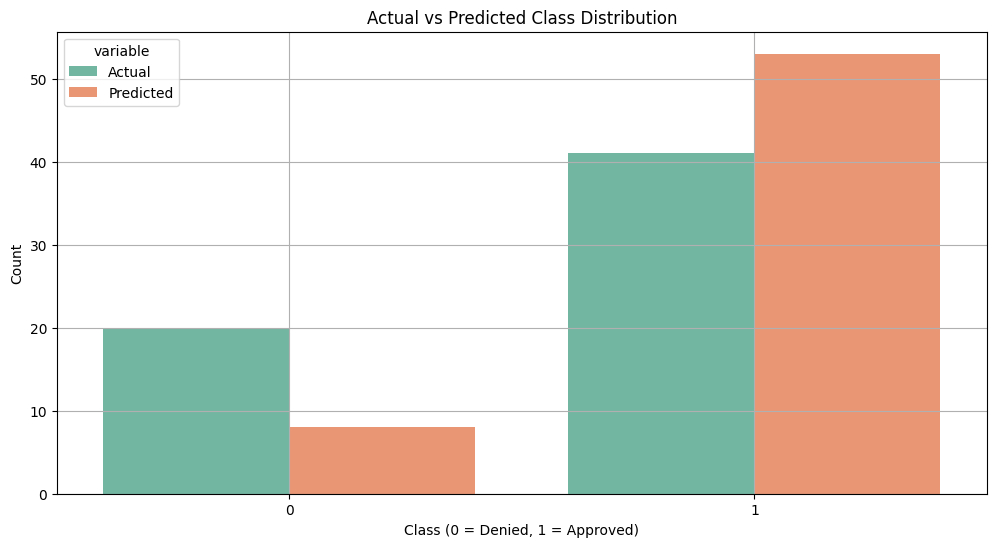

In [ ]:
# We compare the actual values vs the predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_logreg})
plt.figure(figsize=(12, 6))
sns.countplot(data=results.melt(), x='value', hue='variable', palette='Set2')
plt.title("Actual vs Predicted Class Distribution")
plt.xlabel("Class (0 = Denied, 1 = Approved)")
plt.ylabel("Count")
plt.grid()
plt.show()

What to notice in the column chart:


1.   Our test sample is 20% of the data, which means 60 samples - fits in the visual well.
2.   Predictions (Orange), have high variance and predictes in opposite trends cases of denial and approval of loans



**Currently, this fits our hypothesis - logistic regression doesnt handle imbalances so well as the R2 is very low which is far from good prediction power**

#**Training Random Forest Model**


*   Random Forest doesn’t care about feature scale.

*   It splits data by thresholds, not based on distance → so scaling is unnecessary.

---


In [ ]:
#Model 2 Random Forest

rnd_clf = RandomForestClassifier(n_estimators=11, oob_score=True, random_state=42)
rnd_clf.fit(X_test, y_test)


RandomForestClassifier(n_estimators=11, oob_score=True, random_state=42)

Out-of-Bag (OOB) Samples?

When using Random Forests, each tree is trained on a bootstrap sample — this means:





*   A random sample with replacement is taken from the original training data.
*   This means some rows are picked multiple times, and some aren’t picked at all.
* The rows not selected for a particular tree are called out-of-bag samples.

OOB Score meaning:

The OOB score is calculated using the portions of the training data not used in the bootstrap sample for each decision tree.
The OOB score aggregates predictions for each training instance from only those trees where that instance was omitted during training.


In [ ]:
# The score is only relative to previous checks, meant to check if there are sudden drops

print("OOB Score:", rnd_clf.oob_score_)

OOB Score: 0.6557377049180327


In [ ]:
# Saving y predictions based on the Random Forest Classification model
y_pred_rnd_clf = rnd_clf.predict(X_test)

# **Two reasons to choose the hyperparameter - n_estimators =11:**

1. The cross validation score of OOB stagnates at 11, when the number of trees  increase the oob_score starts dropping
2. The R2 Score becomes perfectly fitting when choosing the number 12 for the number of trees - which indicates to overfitting

In [ ]:
print("Logistic Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_logreg))
print("R2 Score:", r2_score(y_test, y_pred_logreg))
print()

print("Random Forest Regressor:")
print("MSE:", mean_squared_error(y_test, y_pred_rnd_clf))
print("R2 Score:", r2_score(y_test, y_pred_rnd_clf))

Logistic Regression:
MSE: 0.19672131147540983
R2 Score: 0.10731707317073158

Random Forest Regressor:
MSE: 0.01639344262295082
R2 Score: 0.9256097560975609


# The difference between the R2_score of the Random Forest and it's OOB_Score doesn't mean something is broken — it may mean:

* The model generalized better than expected
* The test set was easier, or just by chance aligned well
* The OOB evaluation was slightly pessimistic, which is common

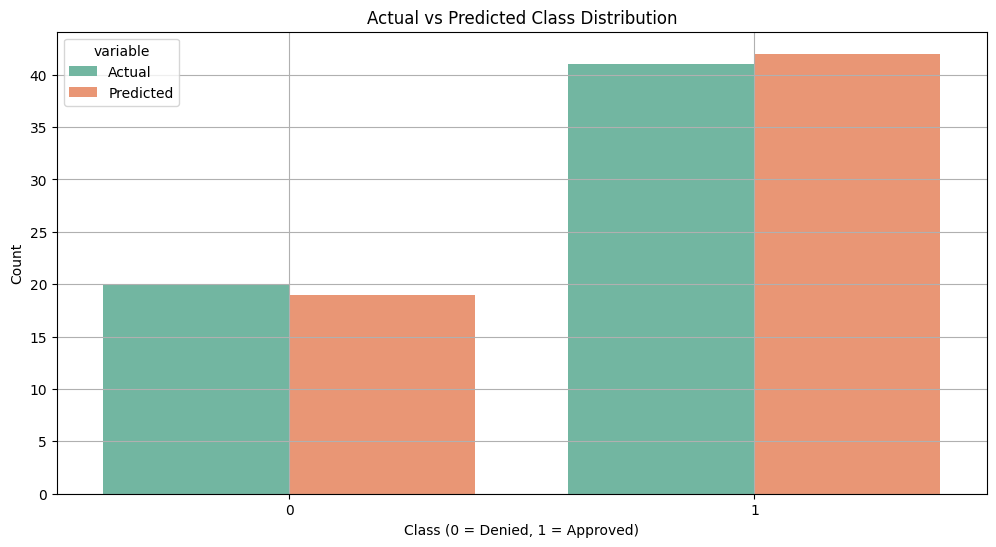

In [ ]:
# We compare the actual values vs the predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rnd_clf})
plt.figure(figsize=(12, 6))
sns.countplot(data=results.melt(), x='value', hue='variable', palette='Set2')
plt.title("Actual vs Predicted Class Distribution")
plt.xlabel("Class (0 = Denied, 1 = Approved)")
plt.ylabel("Count")
plt.grid()
plt.show()

What to notice in the column chart:


1.   Our test sample is 20% of the data, which means 60 samples - fits in the visual well.
2.   Predictions (Orange), have low variance and predictes with high similarity to the actual cases of denial and approval of loans

**Seline Add Here**

# **Conclusion:**

Between the two models, which also aligns with our hypothesis, Random Forest Classifier works well for an imbalanced dataset